# Other procedures to generate XYZ masks

TODO: change

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from diffractio import plt, np, mm, degrees, um
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.diffractio import Diffractio

In [3]:
# change to pv.set_jupyter_backend('trame') for dynamic images.
import pyvista as pv
pv.set_jupyter_backend('static')

## Adding masks

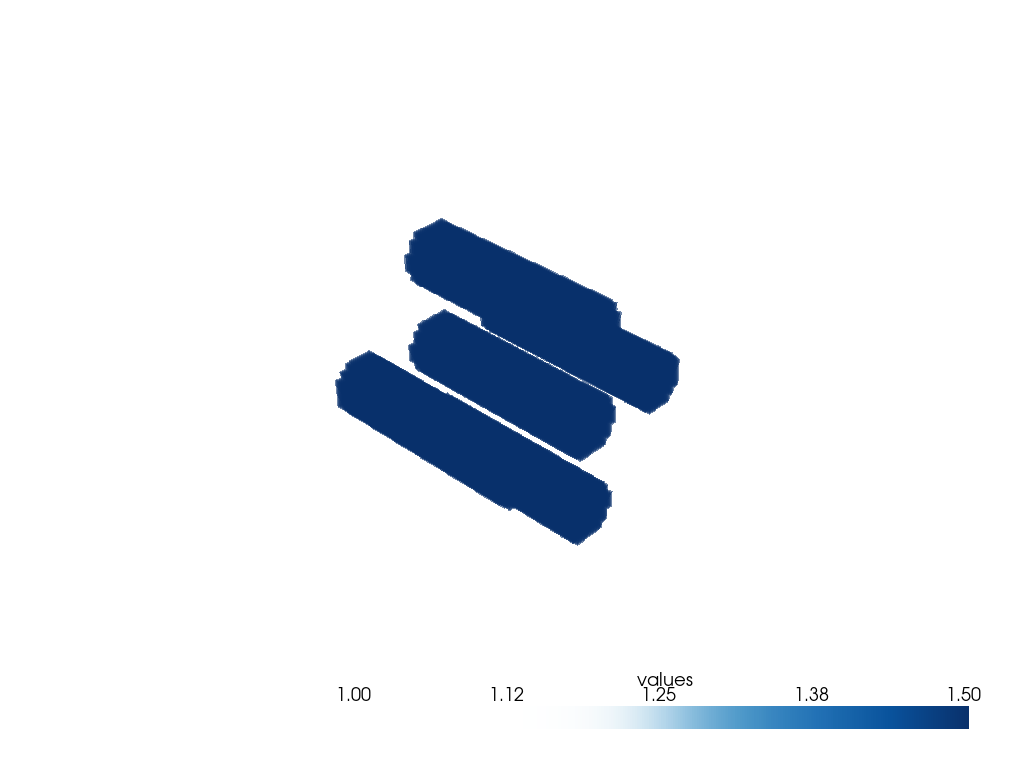

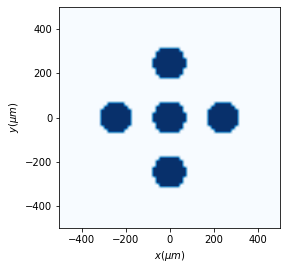

In [4]:
x0 = np.linspace(-500 * um, 500 * um, 64)
y0 = np.linspace(-500 * um, 500 * um, 65)
z0 = np.linspace(0 * um, 1000 * um, 66)
wavelength = 5 * um

params = dict(x = x0, 
              y = y0,
              z = z0,
              wavelength = wavelength,
              n_background = 1.,
              info = '')



txy = Diffractio('scalar', 'mask', x=x0, y=y0, wavelength=wavelength,  info='')
txy1 = Diffractio('scalar', 'mask', x=x0, y=y0, wavelength=wavelength,  info='')

positions = [(-250,0), (250,0), (0,0), (0,250), (0,-250)]

for r0 in positions:
    txy1.circle(r0=r0, radius=75*um)
    txy = txy + txy1


uxyz = Diffractio('scalar', 'mask', **params)
uxyz.extrude_mask_XY(txy=txy, z0= 250*um, z1= 750*um, refractive_index=1.5)
uxyz.draw_XYZ('refractive_index', 'volume')

uxy_new = uxyz.to_Scalar_field_XY(z0=500*um)
uxy_new.draw('refractive_index')

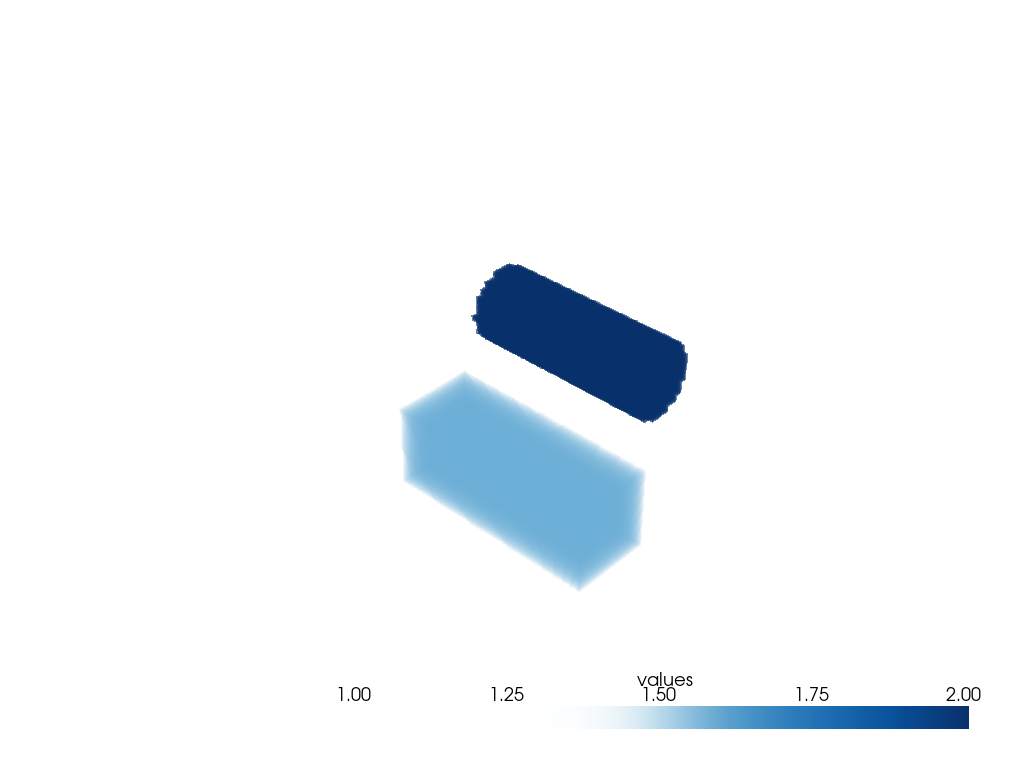

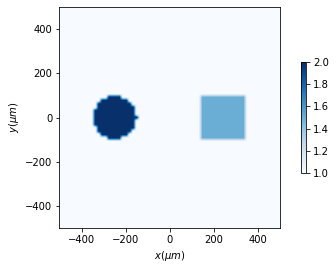

In [5]:
x0 = np.linspace(-500 * um, 500 * um, 64)
y0 = np.linspace(-500 * um, 500 * um, 65)
z0 = np.linspace(0 * um, 1000 * um, 66)
wavelength = 5 * um

params = dict(x = x0, y = y0, z = z0, wavelength = wavelength, n_background = 1., info = '')



txy1= Diffractio('scalar', 'mask', x=x0, y=y0, wavelength=wavelength,  info='')
txy1.circle(r0=(-250, 0), radius=100*um)
txy2 = Diffractio('scalar', 'mask', x=x0, y=y0, wavelength=wavelength,  info='')
txy2.square(r0=(250, 0), size=200*um)


uxyz1 = Diffractio('scalar', 'mask', **params)
uxyz1.extrude_mask_XY(txy=txy1, z0= 250*um, z1= 750*um, refractive_index=2)
uxyz2 = Diffractio('scalar', 'mask', **params)
uxyz2.extrude_mask_XY(txy=txy2, z0= 500*um, z1= 1000*um, refractive_index=1.5)

uxyz = uxyz1 + uxyz2


uxyz.draw_XYZ('refractive_index', 'volume')

uxy_new = uxyz.to_Scalar_field_XY(z0=500*um)
uxy_new.draw('refractive_index', has_colorbar='vertical')


## Substracting masks

The first way to substract mask is generating a first mask and, then, adding other mask with the refractive index of background. 

In [6]:
from diffractio.utils_common import add

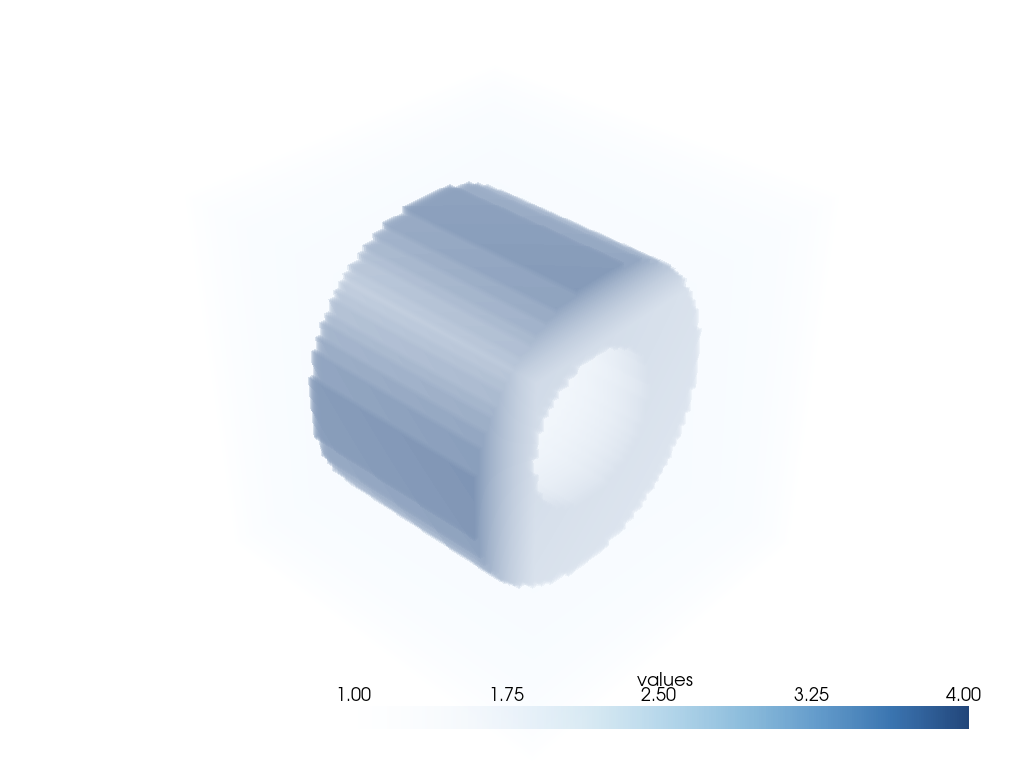

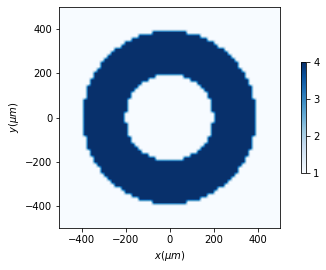

In [7]:
x0 = np.linspace(-500 * um, 500 * um, 64)
y0 = np.linspace(-500 * um, 500 * um, 65)
z0 = np.linspace(0 * um, 1000 * um, 66)
wavelength = 5 * um

params = dict(x = x0, y = y0, z = z0, wavelength = wavelength, n_background = 1., info = '')

txy1= Diffractio('scalar', 'mask', x=x0, y=y0, wavelength=wavelength,  info='')
txy1.circle(r0=(0, 0), radius=400*um)
txy2 = Diffractio('scalar', 'mask', x=x0, y=y0, wavelength=wavelength,  info='')
txy2.circle(r0=(0, 0), radius=200*um)

uxyz1 = Diffractio('scalar', 'mask', **params)
uxyz1.extrude_mask_XY(txy=txy1, z0= 250*um, z1= 750*um, refractive_index=4)
uxyz2 = Diffractio('scalar', 'mask', **params)
uxyz2.extrude_mask_XY(txy=txy2, z0= 250*um, z1= 750*um, refractive_index=-4)


txyz = add(uxyz1, uxyz2, kind='refractive_index')
txyz.draw_XYZ('refractive_index', 'volume', colorbar_kind="vertical", opacity=[0.1, 0.5, 0.9])
uxy_new = txyz.to_Scalar_field_XY(z0=500*um)
uxy_new.draw('refractive_index', has_colorbar='vertical')

In [8]:
from diffractio.utils_common import sub

In [9]:
x0 = np.linspace(-500 * um, 500 * um, 64)
y0 = np.linspace(-500 * um, 500 * um, 65)
z0 = np.linspace(0 * um, 1000 * um, 66)
wavelength = 5 * um

params = dict(x = x0, y = y0, z = z0, wavelength = wavelength, n_background = 1., info = '')


txy1= Diffractio('scalar', 'mask', x=x0, y=y0, wavelength=wavelength,  info='')
txy1.circle(r0=(0, 0), radius=400*um)
txy2 = Diffractio('scalar', 'mask', x=x0, y=y0, wavelength=wavelength,  info='')
txy2.circle(r0=(0, 0), radius=200*um)


uxyz1 = Diffractio('scalar', 'mask', **params)
uxyz1.extrude_mask_XY(txy=txy1, z0= 250*um, z1= 750*um, refractive_index=2)
uxyz2 = Diffractio('scalar', 'mask', **params)
uxyz2.extrude_mask_XY(txy=txy2, z0= 250*um, z1= 750*um, refractive_index=2)


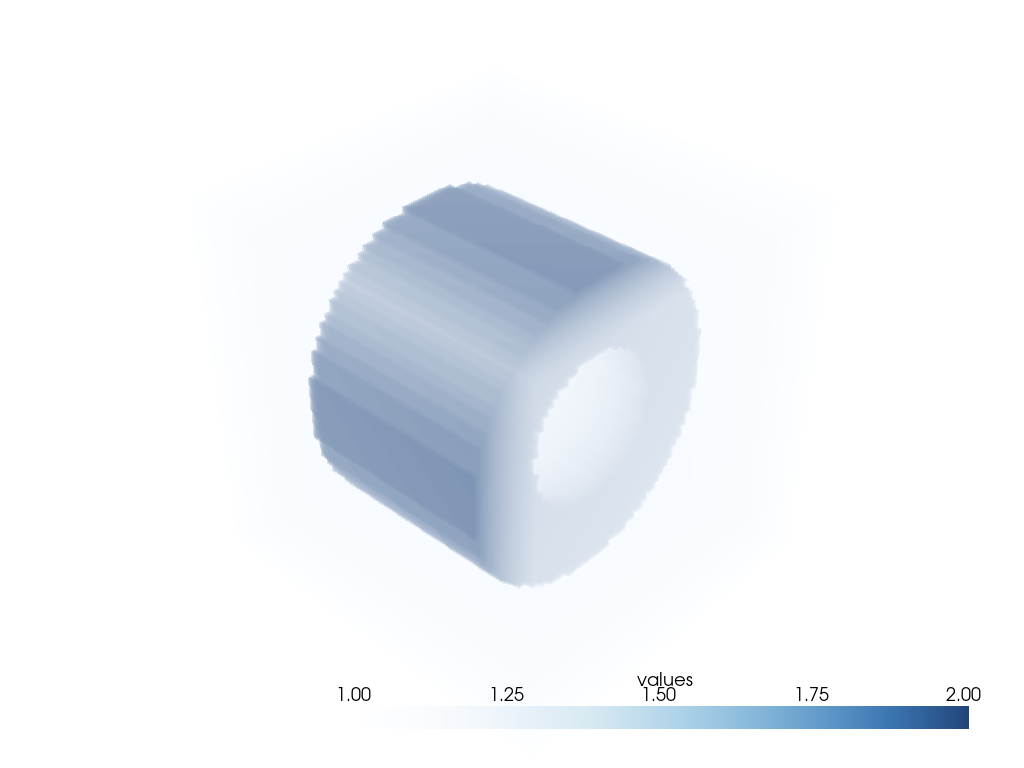

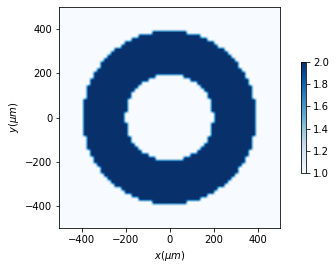

In [10]:
txyz = sub(uxyz1, uxyz2, kind='refractive_index')
txyz.draw_XYZ('refractive_index', 'volume', colorbar_kind="vertical", opacity=[0.1, 0.5, 0.9])
uxy_new = txyz.to_Scalar_field_XY(z0=500*um)
uxy_new.draw('refractive_index', has_colorbar='vertical')

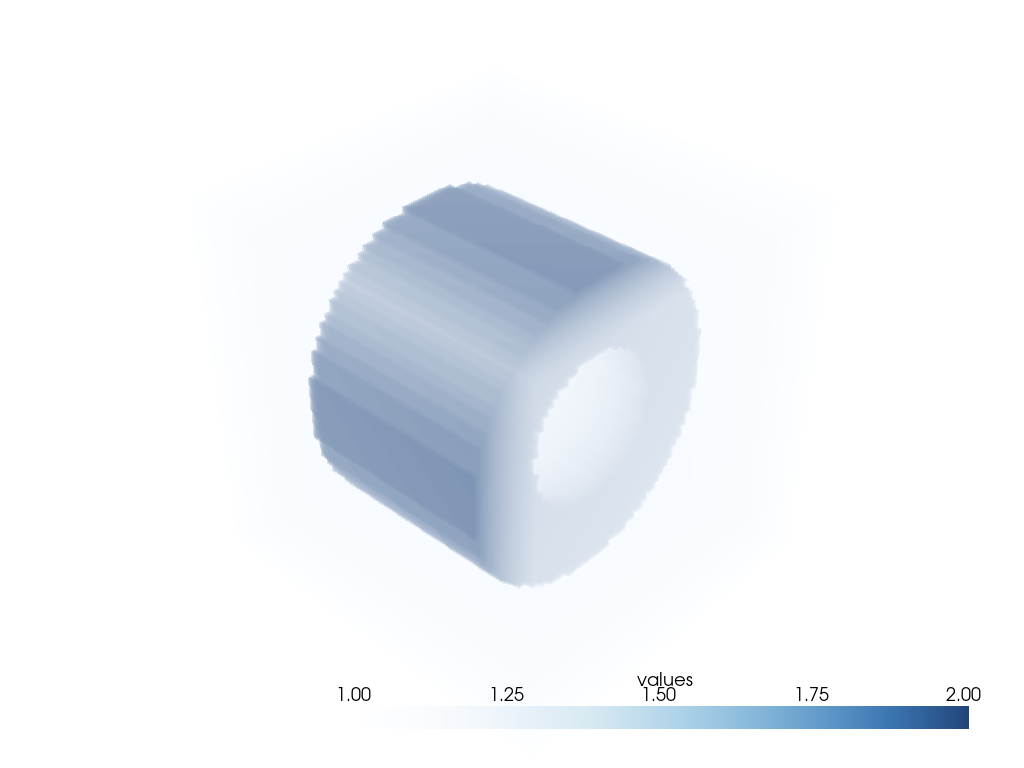

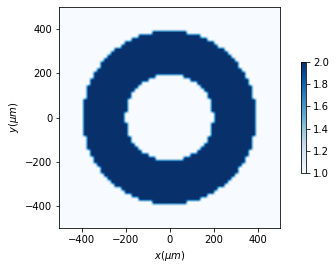

In [12]:
txyz = uxyz1-uxyz2
txyz.draw_XYZ('refractive_index', 'volume', colorbar_kind="vertical", opacity=[0.1, 0.5, 0.9])
uxy_new = txyz.to_Scalar_field_XY(z0=500*um)
uxy_new.draw('refractive_index', has_colorbar='vertical')

## Extruxion for XY mask

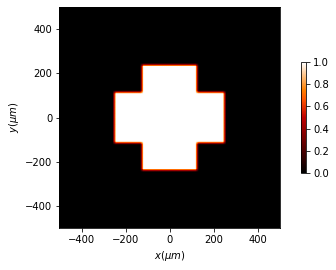

In [ ]:
x0 = np.linspace(-500 * um, 500 * um, 64)
y0 = np.linspace(-500 * um, 500 * um, 65)
z0 = np.linspace(0 * um, 1000 * um, 66)
wavelength = 5 * um

params = dict(x = x0, 
              y = y0,
              z = z0,
              wavelength = wavelength,
              n_background = 1.,
              info = '')


txy = Diffractio('scalar', 'mask', x=x0, y=y0, wavelength=wavelength,  info='')
txy.cross(r0=(0 * um, 0 * um), size=(500 * um, 250 * um), angle=0 * degrees)
txy.draw(has_colorbar='vertical')

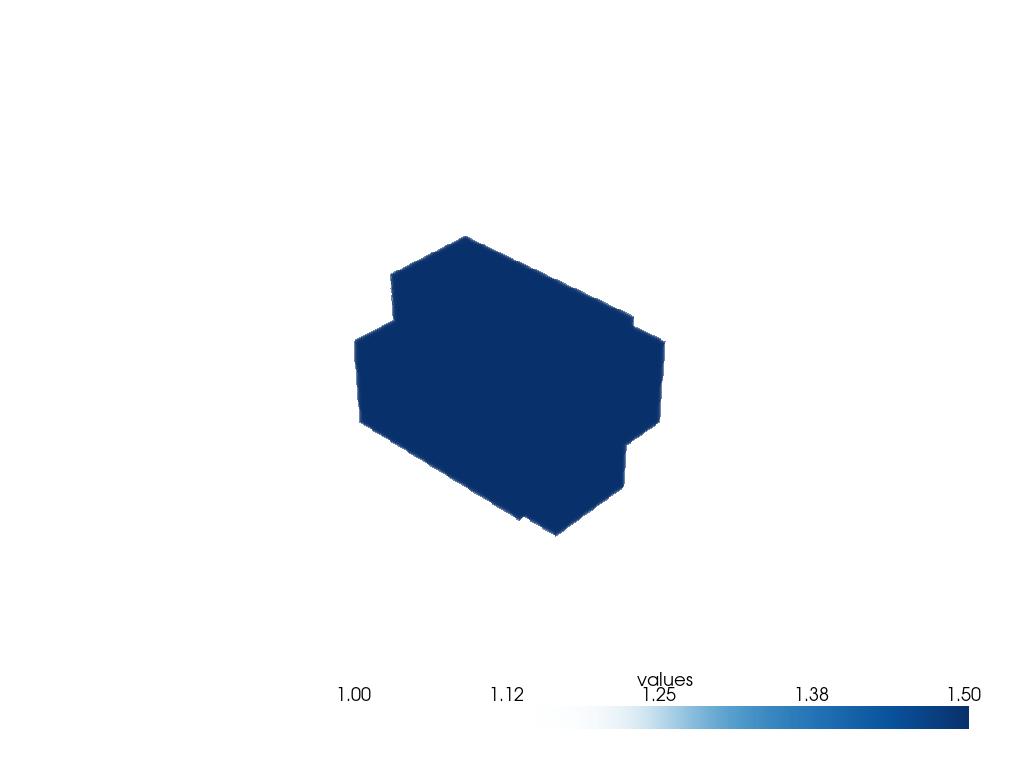

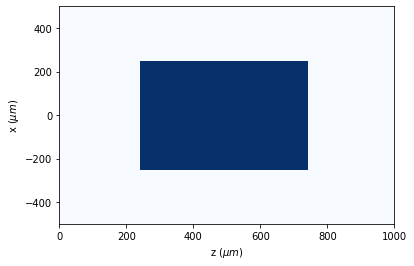

In [ ]:
uxyz = Diffractio('scalar', 'mask', **params)

# if z0 or z1 is None, the mask is extruded to the limits of the z axis.
uxyz.extrude_mask_XY(txy=txy, z0=250*um, z1=750*um, refractive_index=1.5)
uxyz.draw_XYZ('refractive_index', 'volume')

uxz_new = uxyz.to_Scalar_field_XZ(y0=0*um)
uxz_new.draw_refractive_index()

## Extruxion for XZ mask

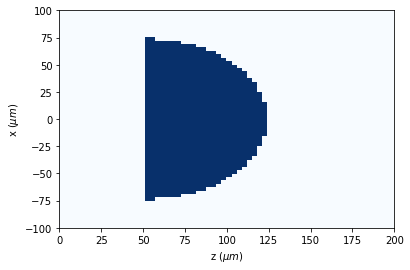

In [ ]:
x0 = np.linspace(-100 * um, 100 * um, 64)
y0 = np.linspace(-100 * um, 100 * um, 65)
z0 = np.linspace(0 * um, 200 * um, 66)
wavelength = 0.5 * um

uxz = Diffractio('scalar', 'mask', x=x0, z=z0, wavelength=wavelength, n_background=1)
uxz.semi_cylinder(
    r0=(0 * um, 50 * um), radius=75 * um, refractive_index=2, angle=0 * degrees
)

uxz.draw_refractive_index()

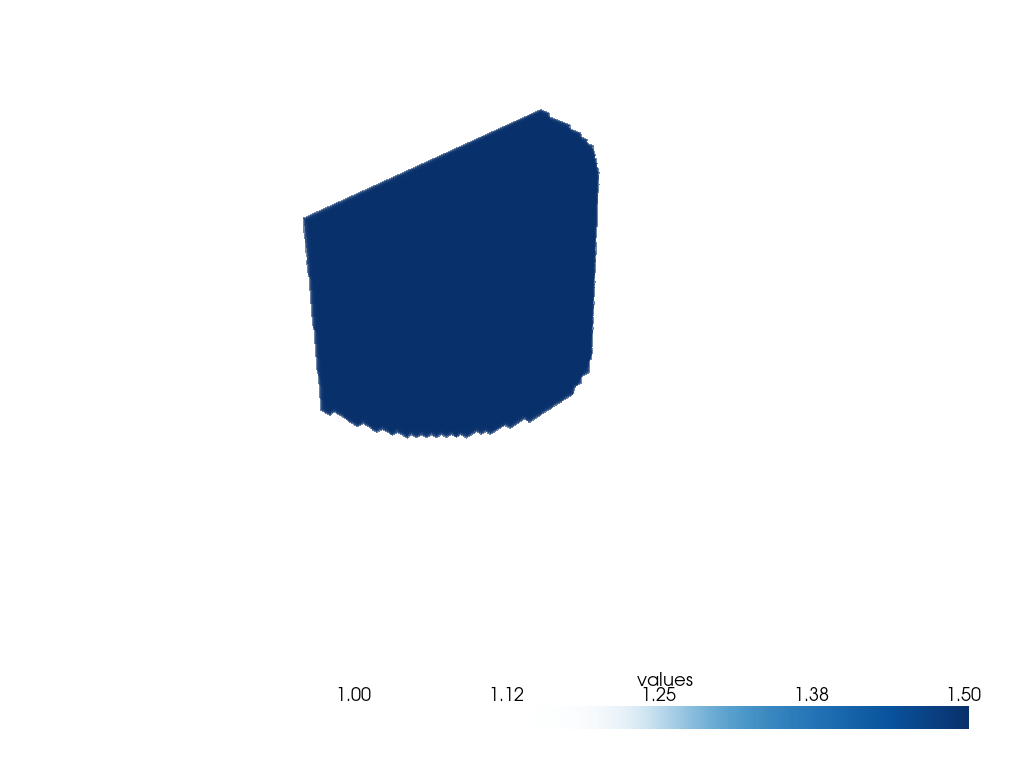

In [ ]:
uxyz = Diffractio('scalar', 'mask', x=x0, y=y0, z=z0, wavelength=wavelength, n_background=1)
    
uxyz.extrude_mask_XZ(txz=uxz, y0=0*um, y1=100*um, refractive_index=1.5, n_new = None)

uxyz.draw_XYZ(kind= "refractive_index", drawing= "volume")

## Extrude radial from XZ

## Rotation

There are two kinds of rotation at XYZ frame: rotation around a point or rotation around an axis.
The rotations are defined by an dictionary. These are two examples:

```python

rotation1 = dict(kind = 'axis', point=(50,0,0), axis=(0,0,1), angle=90*degrees)

rotation2 = dict(kind = 'point', point=(0.,0.,0.), angle=(45*degrees, 45*degrees, 45*degrees))    
```

In [ ]:
x0 = np.linspace(-100*um, 100*um, 64)
y0 = np.linspace(-100*um, 100*um, 64)
z0 = np.linspace(-100*um, 100*um, 64)
wavelength = 0.6238*um
radius = 80*um


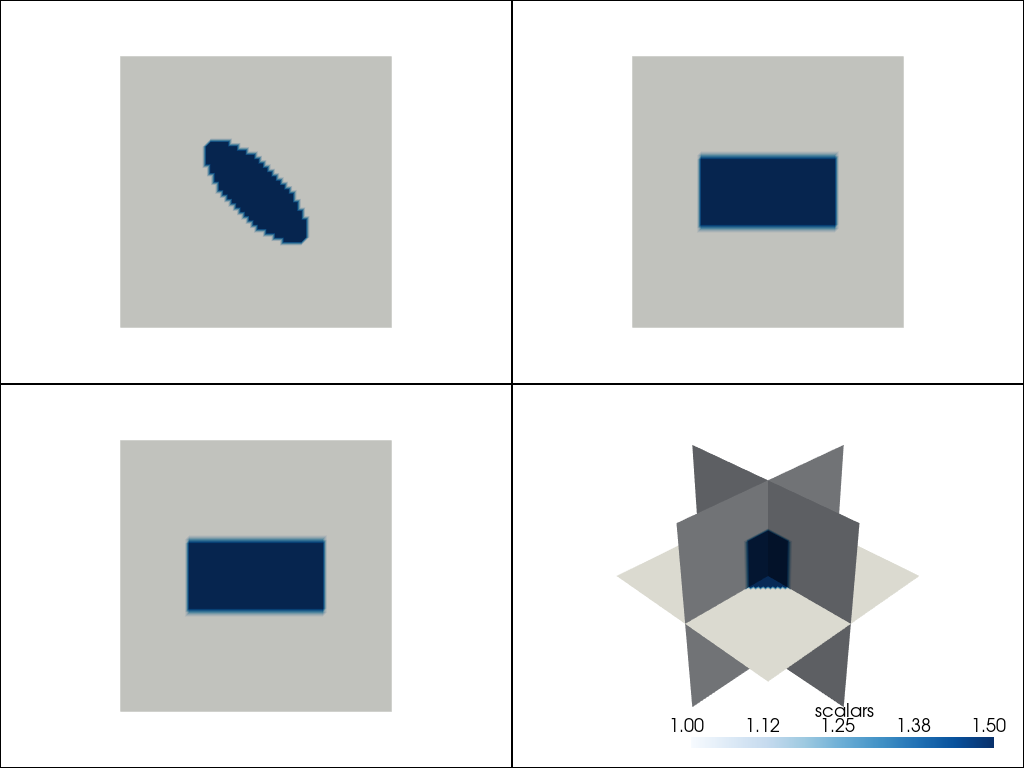

In [ ]:
rotation1 = dict(kind = 'axis', point=(0,0,0), axis=(0,0,1), angle=45*degrees)

t1 = Diffractio('scalar', 'mask',x=x0, y=y0,z=z0, wavelength=wavelength)
t1.cylinder(r0 =(0,0,0), radius = (50*um, 20*um), length=100*um,
                 refractive_index= 1.5, rotation=rotation1)

t1.draw_XYZ(kind= "refractive_index", drawing= "projections", opacity='sigmoid', filename='')

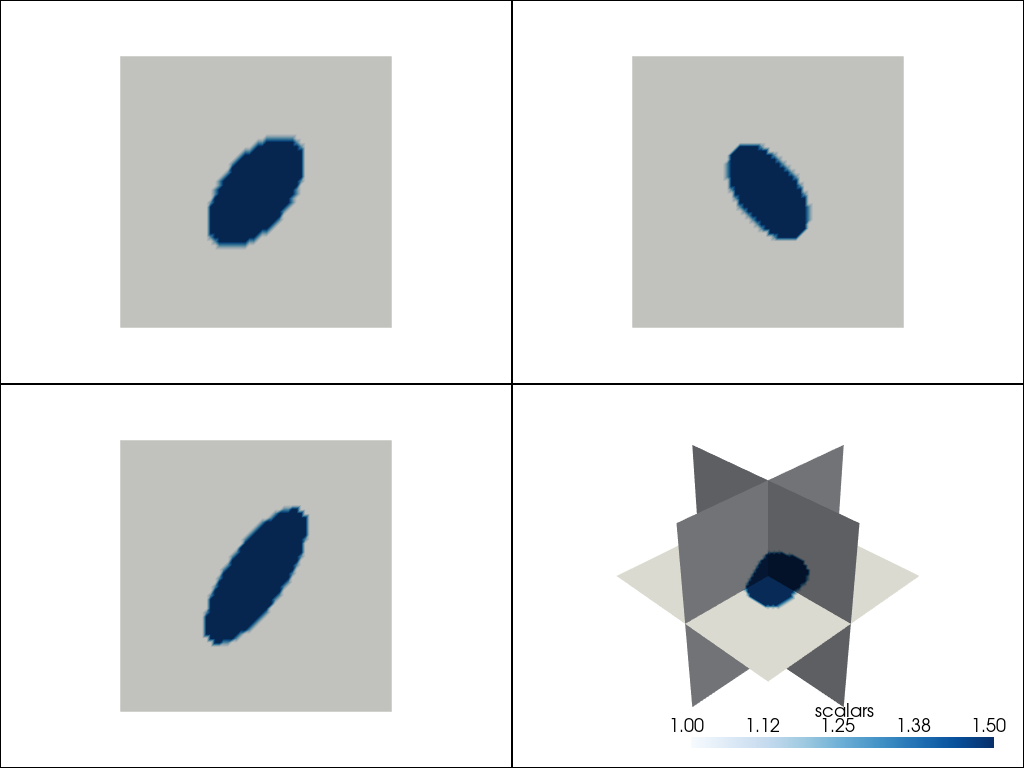

In [ ]:
rotation2 = dict(kind = 'point', point=(0.,0.,0.), angle=(45*degrees, 45*degrees, 45*degrees))    

t1 = Diffractio('scalar', 'mask',x=x0, y=y0,z=z0, wavelength=wavelength)
t1.sphere(r0 =(0,0,0), radius = (60*um, 40*um, 20*um), refractive_index= 1.5, rotation=rotation2)

t1.draw_XYZ(kind= "refractive_index", drawing= "projections", opacity='sigmoid', filename='')

## Mask from surface functions

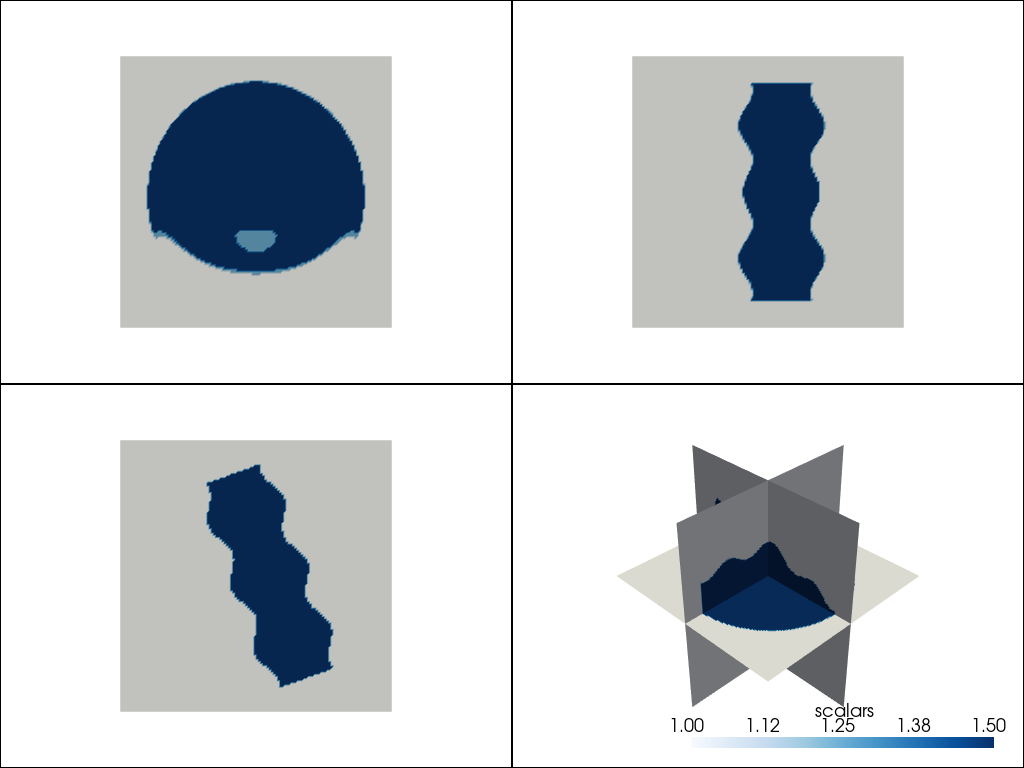

In [ ]:
x0 = np.linspace(-100*um, 100*um, 128)
y0 = np.linspace(-100*um, 100*um, 128)
z0 = np.linspace(-100*um, 100*um, 128)
wavelength = 0.6238*um
radius = 80*um

f1 = 'Zrot>-25*um-5*np.cos(2*np.pi*np.sqrt(Xrot**2+Yrot**2)/50)'
f2 = 'Zrot<25*um+5*np.cos(2*np.pi*np.sqrt(Xrot**2+Yrot**2)/50)'
f3 = 'np.sqrt(Xrot**2+Yrot**2<{}**2)'.format(radius)

fs = [f1,f2,f3]
rotation1 = dict(kind = 'axis', point=(0,0,10), axis=(1,0,0), angle=20*degrees)
rotation2 = dict(kind = 'point', point=(0.,0.,0.), angle=(45*degrees, 45*degrees, 45*degrees))

v_globals = {'um': 1, 'np': np}

t1 = Diffractio('scalar', 'mask', x=x0, y=y0,z=z0, wavelength=wavelength)
ipasa = t1.mask_from_function(
                            r0=(0*um, 0*um),
                            refractive_index=1.5,
                            fs=fs,
                            rotation=rotation1,
                            v_globals=v_globals)


t1.draw_XYZ(kind= "refractive_index", drawing= "projections", opacity='sigmoid', filename='')

## Object by surfaces
TODO